In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/zeel/NSE-ZEEL-EQ_3.csv')
data

,DATE,OPEN,HIGH,LOW,CLOSE,JAW,TEETH,LIPS,MA5,MA15,VROC
0,'2024-07-01 09:48:00',152.08,152.12,152.00,152.00,151.67,151.46,151.96,152.08,151.84,154.34
1,'2024-07-01 09:49:00',152.00,152.01,151.95,152.01,151.65,151.47,151.98,152.06,151.88,-93.42
2,'2024-07-01 09:50:00',152.00,152.00,151.87,152.00,151.63,151.49,151.98,152.02,151.93,-62.87
3,'2024-07-01 09:51:00',152.00,152.05,151.94,152.00,151.61,151.51,151.97,152.00,151.95,161.92
4,'2024-07-01 09:52:00',152.05,152.15,152.00,152.03,151.60,151.54,151.98,152.01,151.98,-41.08
...,...,...,...,...,...,...,...,...,...,...,...
25461,'2024-10-07 15:24:00',126.17,126.25,125.91,125.94,126.33,126.29,125.99,126.11,125.86,-7.16
25462,'2024-10-07 15:25:00',126.00,126.00,125.84,125.90,126.33,126.21,126.01,126.09,125.86,-17.70
25463,'2024-10-07 15:26:00',125.90,125.95,125.80,125.94,126.34,126.15,125.99,126.05,125.87,-18.80
25464,'2024-10-07 15:27:00',125.95,125.95,125.90,125.95,126.34,126.08,125.97,126.00,125.88,-11.34


In [3]:
data.columns

Index(['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'JAW', 'TEETH', 'LIPS', 'MA5',
       'MA15', 'VROC'],
      dtype='object')

In [4]:
data = data.to_numpy()
data = data[:, 1:] # removing the dates column

In [5]:
## print(data.shape)
data[1021:1024]

array([[151.95, 151.95, 151.85, 151.92, 151.79, 151.69, 151.79, 151.89,
        151.74, -24.68],
       [151.9, 151.97, 151.85, 151.91, 151.78, 151.68, 151.82, 151.91,
        151.76, 31.04],
       [151.97, 151.99, 151.74, 151.87, 151.77, 151.67, 151.83, 151.91,
        151.77, 419.43]], dtype=object)

In [6]:
X, y = [], []

In [7]:
X, y = [], []
last_candles_count = 8
next_candles_count = 3

for idx, row in enumerate(data[last_candles_count-1 : 
    -(next_candles_count+1)]):
    idx = idx + last_candles_count + 1
    first_open = data[idx-last_candles_count-1][0]
    first_jaw = data[idx-last_candles_count-1][4]
    first_lip = data[idx-last_candles_count-1][6]
    first_teeth = data[idx-last_candles_count-1][5]
    first_ma5 = data[idx-last_candles_count-1][7]
    first_ma15 = data[idx-last_candles_count-1][8]
    first_volumn_change = data[idx-last_candles_count-1][9]
    last_candles = []
    for candle in data[idx-last_candles_count : idx]:
        temp = []
        temp.append(round(candle[0]-first_open, 2))
        temp.append(round(candle[1]-first_open, 2))
        temp.append(round(candle[2]-first_open, 2))
        temp.append(round(candle[3]-first_open, 2))
        temp.append(round(candle[4]-first_jaw, 2))
        temp.append(round(candle[5]-first_teeth, 2))
        temp.append(round(candle[6]-first_lip, 2))
        temp.append(round(candle[7]-first_ma5, 2))
        temp.append(round(candle[8]-first_ma15, 2))
        # temp.append(round(candle[9]-first_volumn, 2))
        temp.append(round(candle[9]-first_volumn_change, 2))
        # for param in candle:
        #     temp.append(round(param-first_open, 2))
        last_candles.append(temp)
    X.append(last_candles)
    next_candles = []
    for candle in data[idx: idx+next_candles_count]:
        temp = []
        temp.append(round(candle[0]-first_open, 2))
        # temp.append(round(candle[1]-first_open, 2))
        # temp.append(round(candle[2]-first_open, 2))
        # temp.append(round(candle[3]-first_open, 2))
        # temp.append(round(candle[4]-first_jaw, 2))
        # temp.append(round(candle[5]-first_teeth, 2))
        # temp.append(round(candle[6]-first_lip, 2))
        # temp.append(round(candle[7]-first_ma5, 2))
        # temp.append(round(candle[8]-first_ma15, 2))
        # temp.append(round(candle[9]-first_volumn, 2))
        # temp.append(round(candle[10]-first_volumn_change, 2))
        
        # for param in candle:
        #     temp.append(round(param-first_open, 2))
        next_candles.append(temp[0])
    y.append(next_candles)

In [8]:
print("data:\n", data[:8])
print("-1 data:\n", data[-1])
print("\nX:", X[0])
print("\ny:", y[0])
print("X.shape:", np.array(X).shape, "y.shape:", np.array(y).shape)

data:
 [[152.08 152.12 152.0 152.0 151.67 151.46 151.96 152.08 151.84 154.34]
 [152.0 152.01 151.95 152.01 151.65 151.47 151.98 152.06 151.88 -93.42]
 [152.0 152.0 151.87 152.0 151.63 151.49 151.98 152.02 151.93 -62.87]
 [152.0 152.05 151.94 152.0 151.61 151.51 151.97 152.0 151.95 161.92]
 [152.05 152.15 152.0 152.03 151.6 151.54 151.98 152.01 151.98 -41.08]
 [152.03 152.15 152.02 152.1 151.58 151.57 152.0 152.03 152.0 41.15]
 [152.15 152.15 152.0 152.15 151.56 151.61 152.01 152.06 152.02 66.57]
 [152.15 152.15 151.98 151.98 151.54 151.65 152.03 152.05 152.04 3.07]]
-1 data:
 [125.95 126.25 125.91 126.15 126.35 126.03 125.96 125.98 125.91 -17.21]

X: [[-0.08, -0.07, -0.13, -0.07, -0.02, 0.01, 0.02, -0.02, 0.04, -247.76], [-0.08, -0.08, -0.21, -0.08, -0.04, 0.03, 0.02, -0.06, 0.09, -217.21], [-0.08, -0.03, -0.14, -0.08, -0.06, 0.05, 0.01, -0.08, 0.11, 7.58], [-0.03, 0.07, -0.08, -0.05, -0.07, 0.08, 0.02, -0.07, 0.14, -195.42], [-0.05, 0.07, -0.06, 0.02, -0.09, 0.11, 0.04, -0.05, 0.16, -

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Input, Flatten
from sklearn.model_selection import train_test_split

In [10]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.05, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24182, 8, 10), (24182, 3), (1273, 8, 10), (1273, 3))

In [11]:
model = Sequential()
model.add(Input(shape=(last_candles_count, 10)))
model.add(LSTM(200, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(next_candles_count))
# model.add(Reshape((3, 11)))
model.compile(optimizer='adam', loss='mse')

In [12]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.2586 - val_loss: 0.2021
Epoch 2/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.2205 - val_loss: 0.1788
Epoch 3/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1523 - val_loss: 0.1959
Epoch 4/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1561 - val_loss: 0.1726
Epoch 5/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1857 - val_loss: 0.1600
Epoch 6/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1711 - val_loss: 0.1495
Epoch 7/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1249 - val_loss: 0.1589
Epoch 8/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1215 - val_loss: 0.1448
Epoch 9/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1588 - val_loss: 0.1502
Epoch 10/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1246 - val_loss: 0.1440
Epoch 11/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1347 - val_loss: 0.1381
Epoch 12/500
605/605 ━━━━━━━━━

KeyboardInterrupt: 

In [13]:
X.shape, y.shape

(TensorShape([25455, 8, 10]), TensorShape([25455, 3]))

In [14]:
y_pred = model.predict(X[0:1])
y_pred, [0.15, 0.01, 0.35]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


(array([[-0.06133167, -0.06981809, -0.07748324]], dtype=float32),
 [0.15, 0.01, 0.35])

In [15]:
y_pred = model.predict(X_test)
y_pred

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[-0.03555384, -0.04298776, -0.04997829],
       [ 0.03025387,  0.03061651,  0.02695657],
       [-0.10372939, -0.1081451 , -0.11596139],
       ...,
       [-0.4553614 , -0.4680966 , -0.47804302],
       [ 0.47753146,  0.4743232 ,  0.48520237],
       [ 0.57133955,  0.5678241 ,  0.58220965]], dtype=float32)

In [16]:
for y_p, y_t in zip(y_pred, y_test):
    print("\n", (y_t[0]-y_p[0]), "\t", (y_t[1]-y_p[1]), "\t", (y_t[2]-y_p[2]))


 -0.05444617 	 -0.017012235 	 0.029978286

 -0.07025387 	 -0.33061653 	 -0.45695657

 -0.046270616 	 0.3181451 	 0.4659614

 -0.015511632 	 -0.0102797 	 -0.026005805

 -0.14669433 	 -0.1893058 	 -0.020565942

 0.09290624 	 0.0046726167 	 0.113625884

 0.16408335 	 0.01732248 	 0.033133805

 1.1296873 	 -0.20220613 	 -1.0270452

 0.38813123 	 0.12130603 	 0.26869828

 -0.0024468452 	 -0.026849002 	 0.09210996

 -0.005411282 	 -0.022365808 	 0.093701705

 -0.1974982 	 -0.12711143 	 -0.21699041

 -0.008459393 	 0.06896826 	 0.08005529

 -0.026860207 	 0.06405032 	 0.056180507

 -0.046233714 	 -0.06337856 	 -0.20303403

 0.14856523 	 0.17415805 	 1.0937259

 0.0038608983 	 0.10318979 	 0.11314528

 -0.0042091124 	 0.055142105 	 0.12143196

 -0.10343742 	 -0.31541455 	 -0.2881027

 0.028201811 	 0.03823079 	 0.040540427

 0.17887299 	 0.106414825 	 0.13580899

 -0.0827689 	 -0.6895377 	 -0.64562154

 -0.04879745 	 -0.03957212 	 0.01867465

 0.032242343 	 -0.17289898 	 -0.14748178

 -0.0340

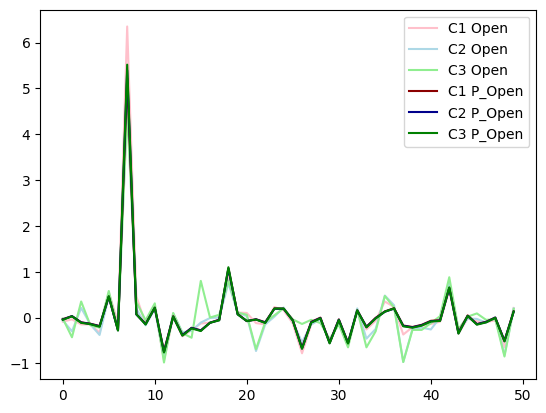

In [17]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
plt.plot(y_test[:50, 0], label='C1 Open', color="pink")
plt.plot(y_test[:50, 1], label='C2 Open', color="lightblue")
plt.plot(y_test[:50, 2], label='C3 Open', color="lightgreen")
plt.plot(y_pred[:50, 0], label='C1 P_Open', color="darkred")
plt.plot(y_pred[:50, 1], label='C2 P_Open', color="darkblue")
plt.plot(y_pred[:50, 2], label='C3 P_Open', color="green")
plt.legend()
plt.show()

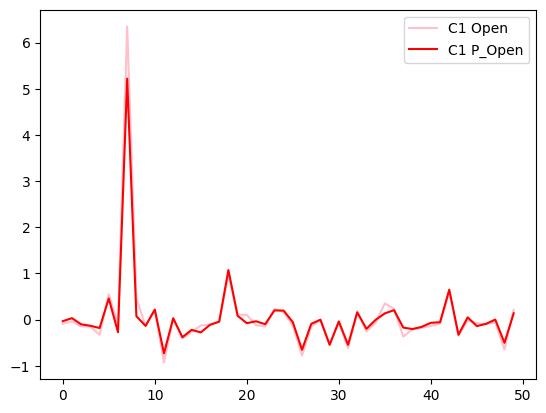

In [18]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
plt.plot(y_test[:50, 0], label='C1 Open', color="pink")
# plt.plot(y[0:5, 1], label='C2 Open', color="blue")
# plt.plot(y[0:5, 2], label='C3 Open', color="green")
plt.plot(y_pred[:50, 0], label='C1 P_Open', color="red")
# plt.plot(y_pred[0:5, 1], label='C2 P_Open', color="darkblue")
# plt.plot(y_pred[0:5, 2], label='C3 P_Open', color="darkgreen")
plt.legend()
plt.show()

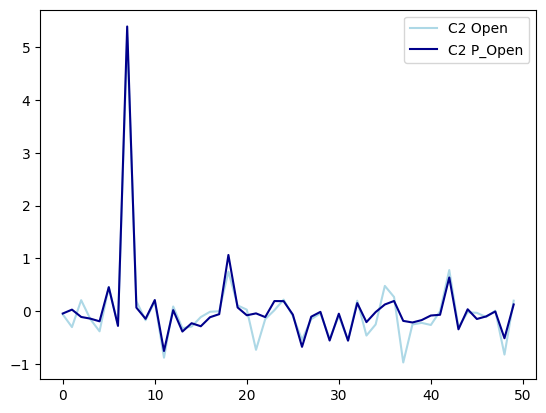

In [19]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
# plt.plot(y[0:5, 0], label='C1 Open', color="red")
plt.plot(y_test[:50, 1], label='C2 Open', color="lightblue")
# plt.plot(y[0:5, 2], label='C3 Open', color="green")
# plt.plot(y_pred[0:5, 0], label='C1 P_Open', color="darkred")
plt.plot(y_pred[:50, 1], label='C2 P_Open', color="darkblue")
# plt.plot(y_pred[0:5, 2], label='C3 P_Open', color="darkgreen")
plt.legend()
plt.show()

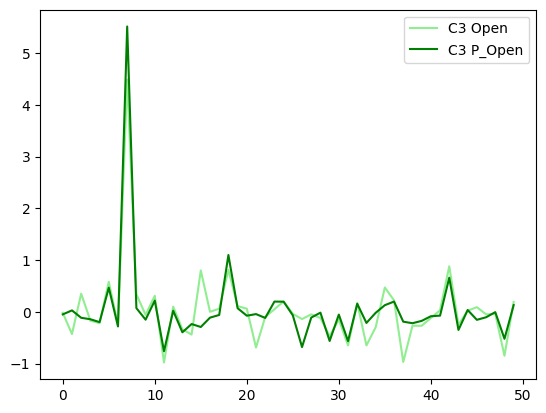

In [20]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
# plt.plot(y[0:5, 0], label='C1 Open', color="red")
# plt.plot(y[0:5, 1], label='C2 Open', color="blue")
plt.plot(y_test[:50, 2], label='C3 Open', color="lightgreen")
# plt.plot(y_pred[0:5, 0], label='C1 P_Open', color="darkred")
# plt.plot(y_pred[0:5, 1], label='C2 P_Open', color="darkblue")
plt.plot(y_pred[:50, 2], label='C3 P_Open', color="green")
plt.legend()
plt.show()

In [21]:
y[0:5], y_pred[0:5]

(<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
 array([[-0.05, -0.09, -0.08],
        [-0.01,  0.  ,  0.07],
        [ 0.  ,  0.07,  0.03],
        [ 0.07,  0.03, -0.23],
        [-0.02, -0.28, -0.24]], dtype=float32)>,
 array([[-0.03555384, -0.04298776, -0.04997829],
        [ 0.03025387,  0.03061651,  0.02695657],
        [-0.10372939, -0.1081451 , -0.11596139],
        [-0.13448837, -0.1397203 , -0.1439942 ],
        [-0.18330568, -0.1906942 , -0.19943406]], dtype=float32))

In [ ]:
# model.save("07OCT.keras")